In [1]:
import collections
from functools import partial
import random

import numpy as np
import tables
import pandas as pd

In [2]:
fname = '../raw/total-3L.h5'

In [3]:
def get_pos_data(store):
    pos_array = store.get_node('/3L/variants/POS').iterrows()
    for pos in pos_array:
        yield pos


In [5]:
store = tables.open_file(fname, 'r')

In [6]:
count_win = collections.defaultdict(int)
win_size = 100000
for pos in get_pos_data(store):
    count_win[pos // win_size] += 1

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

419


<IPython.core.display.Javascript object>


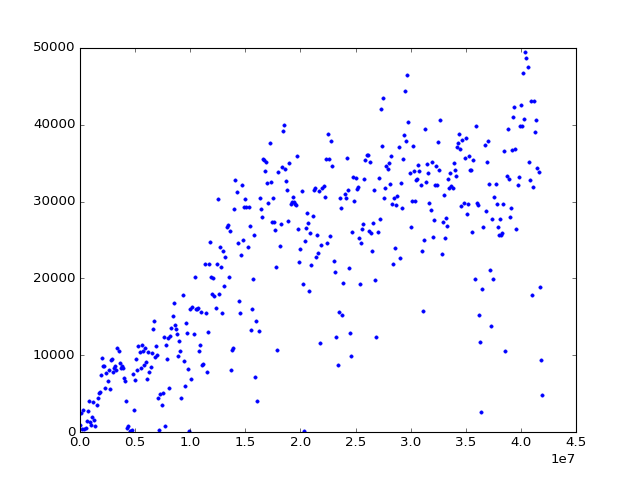

In [11]:
x = sorted(count_win.keys())
y = [count_win[pos] for pos in x]
print(len(x))
plt.plot([xi * win_size for xi in x], y, '.')